# Q3.1

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

languages = {'English':[f"languageID/e{i}.txt" for i in range(10)]
             , 'Japanese': [f"languageID/j{i}.txt" for i in range(10)]
             , 'Spanish': [f"languageID/s{i}.txt" for i in range(10)]}
print("Prior probabilities are:\n")
param = 0.5
files_log_count=[]
for i in languages:
    prob=(len(languages[i]) + param) / (sum(len(i) for i in languages.values()) + param * len(languages))
    print(i,':',prob)
    files_log_count.append(np.log(len(languages[i])))

print("\nLog values stored as :",files_log_count)

Prior probabilities are:

English : 0.3333333333333333
Japanese : 0.3333333333333333
Spanish : 0.3333333333333333

Log values stored as : [2.302585092994046, 2.302585092994046, 2.302585092994046]


# Q3.2

In [2]:
def character_index(ch):
    if ch == ' ':
        return 26
    return ord(ch) - ord('a')

def conditional_prob(x, prob=True ):
    char_count = np.zeros(27,dtype='int')
    for i in range(len(x)):
        file=x[i]
        with open(file, 'r', encoding='utf-8') as f:
            for line in f:
                for char in line:
                    if char in 'abcdefghijklmnopqrstuvwxyz ':
                        char_count[character_index(char)] += 1
    param=0.5
    if prob:
        total_english_chars = np.sum(char_count)
        theta_e = (char_count + param) / (total_english_chars + param * 27)
        return theta_e
    else:
        return char_count

train_e = [f"languageID/e{i}.txt" for i in range(10)]
theta_e = conditional_prob(train_e)
theta_e_log = np.log(theta_e)
print("Theta for English:\n\n", ['{:.5f}'.format(p) for p in theta_e])

Theta for English:

 ['0.06017', '0.01113', '0.02151', '0.02197', '0.10537', '0.01893', '0.01748', '0.04722', '0.05541', '0.00142', '0.00373', '0.02898', '0.02052', '0.05792', '0.06446', '0.01675', '0.00056', '0.05382', '0.06618', '0.08013', '0.02666', '0.00928', '0.01550', '0.00116', '0.01384', '0.00063', '0.17925']


# Q3.3

In [3]:
train_j = [f"languageID/j{i}.txt" for i in range(10)]
theta_j = conditional_prob(train_j)
theta_j_log = np.log(theta_j)

print("Theta for Japanese:\n\n", ['{:.5f}'.format(p) for p in theta_j])

train_s = [f"languageID/s{i}.txt" for i in range(10)]
theta_s = conditional_prob(train_s)
theta_s_log = np.log(theta_s)

print("\nTheta for Spanish:\n\n", ['{:.5f}'.format(p) for p in theta_s])

Theta for Japanese:

 ['0.13177', '0.01087', '0.00549', '0.01723', '0.06020', '0.00388', '0.01401', '0.03176', '0.09703', '0.00234', '0.05741', '0.00143', '0.03980', '0.05671', '0.09116', '0.00087', '0.00010', '0.04280', '0.04217', '0.05699', '0.07062', '0.00024', '0.01974', '0.00003', '0.01415', '0.00772', '0.12345']

Theta for Spanish:

 ['0.10456', '0.00823', '0.03753', '0.03975', '0.11381', '0.00860', '0.00718', '0.00453', '0.04986', '0.00663', '0.00028', '0.05294', '0.02581', '0.05418', '0.07249', '0.02427', '0.00768', '0.05930', '0.06577', '0.03561', '0.03370', '0.00589', '0.00009', '0.00250', '0.00786', '0.00268', '0.16826']


# Q3.4

In [4]:
test_x = ["languageID/e10.txt"]
bag_of_words_x = conditional_prob(test_x, prob=False )

print("Bag-of-words vector for e10.txt is:\n")
for i,char in enumerate('abcdefghijklmnopqrstuvwxyz '):
    print(f"{char}: {bag_of_words_x[i]}",end=", ")

Bag-of-words vector for e10.txt is:

a: 164, b: 32, c: 53, d: 57, e: 311, f: 55, g: 51, h: 140, i: 140, j: 3, k: 6, l: 85, m: 64, n: 139, o: 182, p: 53, q: 3, r: 141, s: 186, t: 225, u: 65, v: 31, w: 47, x: 4, y: 38, z: 2,  : 498, 

# Q3.5

In [76]:
# USING LOG VALUES:
theta=np.array([theta_e_log,theta_j_log,theta_s_log])
likelihood_with_logs=[]
for i in range(len(languages)):
    likelihood_with_logs.append(sum(bag_of_words_x*theta[i]))
print('Likelihood values (log base e) of English, Japanase and Spanish respectively are:',likelihood_with_logs)
print("\nCorresponding log probabilities are:")
print('\nEnglish: p(y=e|x) = exp(-7841.865447)')
print('Japanese: p(y=j|x) = exp(-8771.433079)')
print('Spanish: p(y=s|x) = exp(-8467.282044)')
print('Due to underflow, these values are approximated to 0 by np.exp function.')

Likelihood values (log base e) of English, Japanase and Spanish respectively are: [-7841.865447060635, -8771.433079075032, -8467.282044010557]

Corresponding log probabilities are:

English: p(y=e|x) = exp(-7841.865447)
Japanese: p(y=j|x) = exp(-8771.433079)
Spanish: p(y=s|x) = exp(-8467.282044)
Due to underflow, these values are approximated to 0 by np.exp function.


# Q3.6

In [77]:
# Ignoreing the denominator 
posteriors = []
for i in likelihood_with_logs:
    posteriors.append(np.log(1/3)+i)
print("Predicted class label: English")
print("Log posterio values for y = e,j,s respectively are")
print(posteriors)

Predicted class label: English
Log posterio values for y = e,j,s respectively are
[-7842.964059349303, -8772.5316913637, -8468.380656299225]


# Q3.7

In [42]:
def predict(file):
    bag_of_words_vec = conditional_prob(file, prob=False)
    likelihood_with_logs=[]
    for i in range(len(languages)):
        likelihood_with_logs.append(sum(bag_of_words_vec*theta[i]))
    posteriors = []
    for i in likelihood_with_logs:
        posteriors.append(np.log(1/3)+i)
    p=np.argmax(posteriors)
    if(p==0):
        return "English"
    elif(p==1):
        return "Japanese"
    else:
        return "Spanish"

Text(0, 0.5, 'Predicted Label')

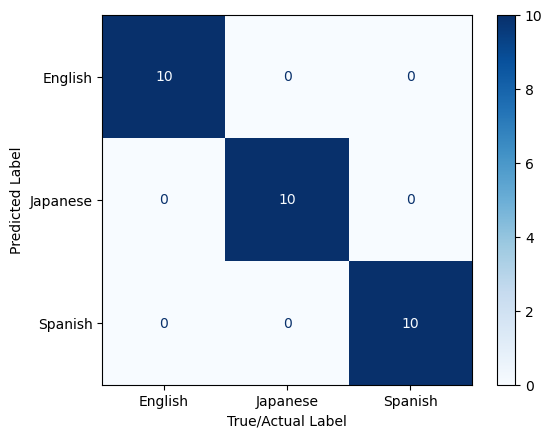

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_files = np.array([
    [f"languageID/e{i}.txt" for i in range(10, 20)],
    [f"languageID/j{i}.txt" for i in range(10, 20)],
    [f"languageID/s{i}.txt" for i in range(10, 20)]]).flatten()

predicted=[]
actual= np.array([
    [f"English" for i in range(10, 20)],
    [f"Japanese" for i in range(10, 20)],
    [f"Spanish" for i in range(10, 20)]]).flatten()

for i in range(len(test_files)):
    predicted.append(predict([test_files[i]]))

cm = confusion_matrix(actual, predicted, labels=["English", "Japanese", "Spanish"]).T
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["English", "Japanese", "Spanish"])
plot = disp.plot(cmap=plt.cm.Blues)
plot.ax_.set_xlabel('True/Actual Label')
plot.ax_.set_ylabel('Predicted Label')

# Q3.8

No.
If we take a test document and arbitrarily shuffle the order of its characters so that the words (and spaces)
are scrambled beyond human recognition, it will not affect the Naive Bayes classifier's result in any way. This is because the
classifier works based on the principle of bag of words. In other terms, it uses a count vector which maintains the count of 
the occurance of all the characters in the file. Even after shuffling the characters such that it makes no sense, we get the same
count vectors for each file. Thus, the classifier's prediction does not change either. 
To calculate the likelihood for a document, we raise the conditional probabilities of the characters to the power of the number of
times it appears in the document, thus unaffected by the order of the characters. This revolves around Naive Bayes' key property:
independence of the features involved.

In [69]:
file_path = f'languageID/s12.txt'
import pandas as pd
import random
from collections import Counter

with open(file_path) as f:
    doc = f.read()

replace_chars = ['\n', '\t']
for r_char in replace_chars:
    doc = doc.replace(r_char, '')

random = list(doc)
np.random.shuffle(random)
random = ''.join(random)

with open('new_test_random.txt', 'w') as f:
    f.write(random)

In [66]:
print(predict([file_path]))

Spanish


In [72]:
print(predict(['new_test_random.txt']))

Spanish
